# Ui-Wing Cheah
## EN 625.633 Module 11 Assignment

In [62]:
# imports
import scipy.stats as sp 
import numpy as np 
import statsmodels.api as smapi 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [7]:
# getting the salmon data
# we take the data from the R file and put it in an Excel File
# since the data set was small we did this manually
# for large data sets we would parse the original R file directly
src = 'c:/Users/nowuc/Code/data/salmon_data.xlsx'
xl_file = pd.ExcelFile(src)
salmon_data = xl_file.parse('salmon_data')
salmon_data.head()

,R,S
0,68,56
1,77,62
2,299,445
3,220,279
4,142,138


In [8]:
salmon_data.describe()

,R,S
count,40.000000,40.000000
mean,259.425000,272.850000
std,339.279545,129.792843
min,64.000000,51.000000
25%,164.750000,172.500000
50%,221.000000,274.500000
75%,275.000000,393.500000
max,2306.000000,490.000000


In [38]:
# set up a simple linear regression model for the whole sample. 
# show the results and also find the point where R=S
est_sustain = lambda beta: (1-beta[1])/beta[0]
est_R = lambda beta,S:1/(beta[0]+beta[1]/S)
# getting the reciprocals
x_var = 1/salmon_data['S'].values
y_var = 1./salmon_data['R'].values

x_var = smapi.add_constant(x_var)

In [24]:
lm_1 = smapi.OLS(y_var,x_var,)
lm_1_results = lm_1.fit()

In [22]:
lm.fit()

In [39]:
bhat = lm_1_results.params
print(bhat)
R_fit = est_R(bhat,salmon_data['S'].values)
print(R_fit)

[0.00184661 0.70810973]
[ 69.00633518  75.37083676 290.87826857 228.06919987 143.31089837
 285.62709485 245.91860271 113.78041589  63.56830099 232.73062479
 258.79829655 229.48233734 242.08201958 221.79474545 216.79464458
 147.84074607 291.48191957 176.87694738 272.70694922 123.25799104
 280.47978246 170.35899394 243.37189792 160.83236121 265.19447295
  66.84603843 193.96646326 285.94207049 124.9362455  278.82851398
 221.30167496 238.14454238 205.22433877 202.47879955 223.75193645
 300.48008884 282.75698822 303.79177786 286.25627173 205.76811948]


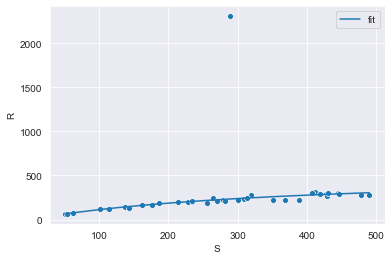

In [54]:
# creating line/scatter plot
sns.set_style('darkgrid')
ax_ = sns.scatterplot(data=salmon_data,x='S',y='R')
ax_ = sns.lineplot(x=salmon_data['S'].values,y=R_fit,label='fit',)


In [26]:
print(lm_1_results.summary())

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     836.6
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           1.74e-27
Time:                        20:58:26   Log-Likelihood:                 233.94
No. Observations:                  40   AIC:                            -463.9
Df Residuals:                      38   BIC:                            -460.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.000     10.550      0.000       0.001       0.002
x

In [59]:
print(lm_1_results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.957   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.955   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     836.6   \\
\textbf{Date:}             & Mon, 13 Apr 2020 & \textbf{  Prob (F-statistic):} &  1.74e-27   \\
\textbf{Time:}             &     21:16:00     & \textbf{  Log-Likelihood:    } &    233.94   \\
\textbf{No. Observations:} &          40      & \textbf{  AIC:               } &    -463.9   \\
\textbf{Df Residuals:}     &          38      & \textbf{  BIC:               } &    -460.5   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\

In [60]:
lm_1_results.resid

array([ 2.14459247e-04, -2.80718181e-04, -9.33826426e-05,  1.60820406e-04,
        6.44171433e-05, -1.67478566e-05, -4.43197744e-04, -9.32065429e-05,
       -1.06111016e-04, -3.86316177e-03,  6.40491436e-04,  5.20414936e-04,
        1.61014126e-04, -1.22708176e-04,  7.06488868e-04,  8.11722446e-04,
        7.80274037e-05, -3.34499065e-04,  7.97345789e-04,  1.51398565e-04,
       -3.49885282e-04,  1.54139204e-04, -7.66797732e-05, -6.47403729e-06,
        6.53961108e-04, -3.43765152e-05, -1.80406033e-04,  2.48106493e-04,
        2.60380440e-04, -2.64174639e-04, -4.20357968e-04,  3.05374052e-04,
        2.55488734e-04, -1.26802900e-05,  2.92669698e-04,  3.08356101e-04,
       -4.01022874e-05,  3.44635312e-04, -2.03899558e-04, -1.86942134e-04])

In [61]:
np.random.choice/

SyntaxError: invalid syntax (<ipython-input-61-d375fb72b915>, line 1)